In [146]:
!pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [148]:
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(7)

In [149]:
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.01

In [150]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

mean = np.mean(train_images)
sttdev = np.std(train_images)

train_images = (train_images-mean) / sttdev
test_images = (test_images-mean) / sttdev

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [151]:

initializer = keras.initializers.he_normal()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='sigmoid',
        kernel_initializer=initializer,
        bias_initializer='zeros')

])


C:\Users\madro\OneDrive\Документы\GitHub\Khokhlov_Dimitrii_20221_24\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [152]:
opt = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [153]:
history = model.fit(train_images, train_labels,validation_data = (test_images,test_labels), epochs=EPOCHS,verbose = 2, batch_size=BATCH_SIZE, shuffle=True)

Epoch 1/10
1875/1875 - 3s - 2ms/step - accuracy: 0.8637 - loss: 0.4872 - val_accuracy: 0.9338 - val_loss: 0.2287
Epoch 2/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9301 - loss: 0.2436 - val_accuracy: 0.9521 - val_loss: 0.1607
Epoch 3/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9477 - loss: 0.1806 - val_accuracy: 0.9606 - val_loss: 0.1282
Epoch 4/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9594 - loss: 0.1426 - val_accuracy: 0.9663 - val_loss: 0.1103
Epoch 5/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9672 - loss: 0.1157 - val_accuracy: 0.9690 - val_loss: 0.0999
Epoch 6/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9737 - loss: 0.0955 - val_accuracy: 0.9709 - val_loss: 0.0937
Epoch 7/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9792 - loss: 0.0795 - val_accuracy: 0.9718 - val_loss: 0.0901
Epoch 8/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9829 - loss: 0.0664 - val_accuracy: 0.9729 - val_loss: 0.0882
Epoch 9/10
1875/1875 - 2s - 1ms/step - accuracy: 0.9870 - loss: 0.0553 - val_accuracy: 0.9734 - 

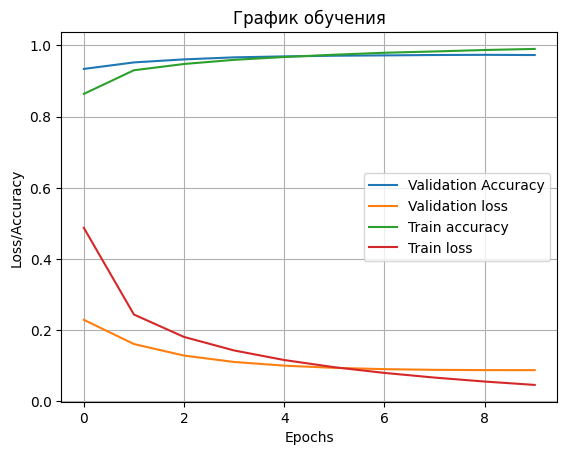

In [156]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(list(range(EPOCHS)), history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(list(range(EPOCHS)), history.history['val_loss'], label='Validation loss')
plt.plot(list(range(EPOCHS)), history.history['accuracy'], label='Train accuracy')
plt.plot(list(range(EPOCHS)), history.history['loss'], label='Train loss')
plt.title('График обучения')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend()
plt.show()